In [ ]:
import requests
import json
import time

l = [135,1325,927,992,1270,1220,242,1247,32,825,982,1003,1257,1349,90,274,1513,599,1008,1115,237
     ,1237,601,685,1078,1094,958,1095,3963,440,565,1087,1340,1521,850,1223,807,971,973,960,1596,1320]

def parse(x) :
    res = []
    univ = str(x)
    pageNum = 0
    while True:
        pageNum += 1
        response = json.loads(requests.get("http://www.ratemyprofessors.com/filter/professor/?department=&institution=California+State+University%2C+Northridge&page="+str(pageNum)+"&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid="+univ).text)
        l = [
            [response['professors'][i]['categoryType'],
             response['professors'][i]['contentType'],
             response['professors'][i]['institution_name'].replace(',', ''),
             response['professors'][i]['overall_rating'],
             response['professors'][i]['rating_class'],
             response['professors'][i]['tDept'].replace(',', ''),
             response['professors'][i]['tFname'].replace(',', ''),
             response['professors'][i]['tLname'].replace(',', ''),
             response['professors'][i]['tMiddlename'].replace(',', ''),
             response['professors'][i]['tNumRatings'],
             response['professors'][i]['tSid'],
             response['professors'][i]['tid']
            ]
            for i in range(len(response['professors']))]
        if response['remaining'] == 0 :
            break
        res += l
    return res

fName = 'univ'
f = open(fName + '.csv', 'a')

start_time = time.time()
for i in l :
    #if i%50 == 0 and i > 0:
    end_time = time.time()
    print(i)
    print("%s s" % round((end_time - start_time), 2))
    start_time = end_time
    res = parse(i)

    for x in res :
        for y in x :
            f.write(str(y) + ',')
        f.write('\n')

f.close()


135
0.0 s


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('faculty.csv')

In [3]:
data.head()

,categoryType,contentType,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,tSid,tid
0,PROFESSOR,TEACHER,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,780,336888
1,PROFESSOR,TEACHER,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,780,1695875
2,PROFESSOR,TEACHER,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,780,2020549
3,PROFESSOR,TEACHER,Princeton University,4.5,good,Languages,Kun,An,NaN,2,780,938767
4,PROFESSOR,TEACHER,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,780,693431


In [4]:
data.shape

(211040, 12)

### Department count:

In [5]:
pd.DataFrame(data.tDept.value_counts())

,tDept
English,15958
Mathematics,14188
Engineering,8492
Psychology,7948
History,7226
Languages,7016
Economics,6774
Biology,5754
Political Science,5734
Chemistry,5491


### Number of departments:

In [6]:
data.tDept.nunique()

1119

In [7]:
data.institution_name.nunique()

102

In [8]:
pd.DataFrame(data.institution_name.value_counts())

,institution_name
The Ohio State University,6440
Pennsylvania State University,5940
Rutgers - State University of New Jersey,5760
University of Florida,4900
Florida State University,4840
University of Minnesota-Twin Cities,4820
University of Michigan,4680
Brigham Young University,4340
University of California Davis,4300
Indiana University Bloomington,4260


In [9]:
sbu = data.loc[data['institution_name'] == "Stony Brook University (SUNY)"]

In [10]:
sbu.head()

,categoryType,contentType,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,tSid,tid
200920,PROFESSOR,TEACHER,Stony Brook University (SUNY),3.0,average,Physics,Alexandre G.,Abanov,NaN,11,971,837750
200921,PROFESSOR,TEACHER,Stony Brook University (SUNY),5.0,good,Education,Alfred,Abato,NaN,3,971,1115249
200922,PROFESSOR,TEACHER,Stony Brook University (SUNY),4.3,good,Business,Camille,Abbruscato,NaN,45,971,921236
200923,PROFESSOR,TEACHER,Stony Brook University (SUNY),3.7,good,Mathematics,Mahmoud,Abd-El-Hafez,NaN,43,971,1770240
200924,PROFESSOR,TEACHER,Stony Brook University (SUNY),5.0,good,Civil Engineering,Sherif,Abdelaziz,NaN,2,971,2245469


In [11]:
sbu.shape

(3040, 12)

### SBU Unique Fname and Lname:

In [12]:
sbu.groupby(['tFname','tLname']).size().reset_index().rename(columns={0:'count'})

,tFname,tLname,count
0,Hyun-Kyung,Lim,1
1,A. W.,Cafarelli,1
2,A.K.M.,Mollah,1
3,Aaron,Duykers,1
4,Aaron,Evans,1
5,Aaron,Godfrey,1
6,Aaron,Kim,1
7,Aaron,Smith,1
8,Aarushi,Bhandari,1
9,Abe,Lurie,1


### SBU Department breakdown:

In [13]:
pd.DataFrame(sbu.tDept.value_counts())

,tDept
Mathematics,284
Writing,143
Philosophy,128
Languages,123
Psychology,123
English,120
Engineering,119
Biology,118
History,111
Political Science,110


In [17]:
data.tMiddlename.nunique()

1513

In [20]:
name = data.loc[:,['tFname','tLname']]

In [21]:
name

,tFname,tLname
0,Al,Acres
1,Alicia,Adsera
2,Ilhan,Aksay
3,Kun,An
4,Sarah,Anderson
5,Amale,Andros
6,Saul,Anton
7,Andrew,Appel
8,Elizabeth,Armstrong
9,Oliver,Arnold


In [25]:
name.to_csv('profnames.csv', index=False)

In [2]:
prof_data = pd.read_csv('profdata.csv')

In [3]:
prof_data.head()

,categoryType,contentType,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,tSid,tid,2PRACE,AIAN,API,Black,Hispanic,White
0,PROFESSOR,TEACHER,University of Connecticut,4.6,good,Music,Penny,Brandt,NaN,16,1091,1393729,2.590460e-04,6.144341e-04,0.001396,0.001873,0.001432,0.994426
1,PROFESSOR,TEACHER,University of Connecticut,4.0,good,Sociology,Ruth,Braunstein,NaN,4,1091,2014347,3.342416e-04,6.086560e-04,0.001473,0.000826,0.008896,0.987862
2,PROFESSOR,TEACHER,University of Connecticut,4.2,good,Mathematics,Michael,Braunstein,NaN,24,1091,1672204,2.825085e-04,5.450262e-04,0.001244,0.000715,0.004199,0.993015
3,PROFESSOR,TEACHER,University of Connecticut,3.0,average,Agriculture,Boris,Bravo-Ureta,NaN,1,1091,1844029,1.575255e-07,3.150510e-07,0.004268,0.006756,0.024017,0.964958
4,PROFESSOR,TEACHER,University of Connecticut,3.9,good,English,Margaret,Breen,NaN,10,1091,1032186,2.969114e-04,4.196018e-04,0.001905,0.017101,0.002376,0.977902


In [6]:
prof_data.describe()

,overall_rating,tNumRatings,tSid,tid,2PRACE,AIAN,API,Black,Hispanic,White
count,43824.000000,48079.000000,48079.000000,4.807900e+04,48079.000000,48079.000000,4.807900e+04,4.807900e+04,4.807900e+04,48079.000000
mean,3.736993,9.632022,978.466607,1.271842e+06,0.000786,0.001272,9.835434e-02,3.312092e-02,4.029897e-02,0.826168
std,1.038211,25.844383,469.847133,6.740513e+05,0.003853,0.005579,2.755055e-01,7.299014e-02,1.550716e-01,0.304310
min,1.000000,0.000000,32.000000,1.890000e+02,0.000000,0.000000,2.863513e-08,1.454960e-08,2.196592e-07,0.000061
25%,3.000000,2.000000,825.000000,7.340265e+05,0.000224,0.000312,1.268302e-03,1.091251e-03,1.754730e-03,0.884840
50%,4.000000,4.000000,1220.000000,1.284099e+06,0.000396,0.000849,2.407299e-03,9.248152e-03,3.467981e-03,0.958217
75%,4.600000,10.000000,1270.000000,1.889229e+06,0.000596,0.001652,8.095999e-03,3.896468e-02,8.716150e-03,0.988376
max,5.000000,3955.000000,1530.000000,2.291287e+06,0.307120,0.886619,9.998920e-01,9.971665e-01,9.972413e-01,0.999999


In [8]:
prof_data.Black.hist()

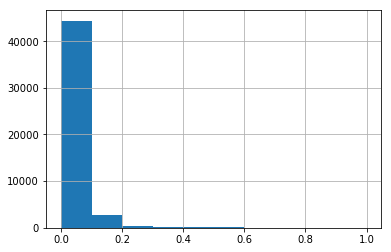

In [10]:
import matplotlib.pyplot as plt
plt.show()

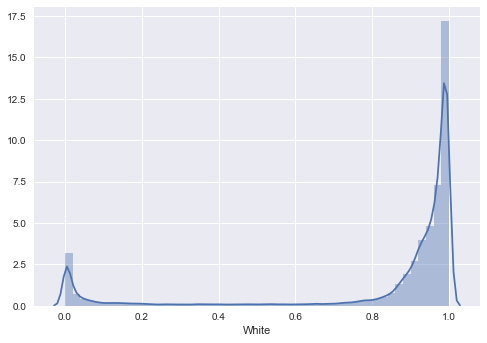

In [47]:
#prof_data['Zscore'] = prof_data.Black.apply(lambda x: x.div(x.mean()))
import seaborn as sns

sns.distplot(prof_data['White'])
#sns.plt.xlim(0, 0.25)
plt.show()

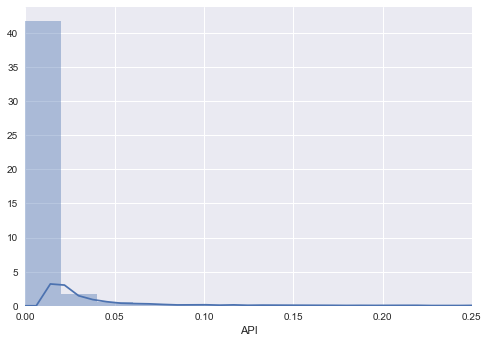

In [45]:
sns.distplot(prof_data['API'])
sns.plt.xlim(0, 0.25)
plt.show()

In [55]:
import csv 
import sys
file_name = sys.argv[1]
with open('profdata.csv', 'rU') as f:
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=','))
data

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


[['categoryType',
  'contentType',
  'institution_name',
  'overall_rating',
  'rating_class',
  'tDept',
  'tFname',
  'tLname',
  'tMiddlename',
  'tNumRatings',
  'tSid',
  'tid',
  '2PRACE',
  'AIAN',
  'API',
  'Black',
  'Hispanic',
  'White'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.6',
  'good',
  'Music',
  'Penny',
  'Brandt',
  '',
  '16',
  '1091',
  '1393729',
  '0.0002590460353803435',
  '0.0006144340846888789',
  '0.0013960570953735817',
  '0.001873081465706425',
  '0.001431663047846747',
  '0.9944257182710039'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.0',
  'good',
  'Sociology',
  'Ruth',
  'Braunstein',
  '',
  '4',
  '1091',
  '2014347',
  '0.00033424156809257167',
  '0.0006086559911092728',
  '0.0014728104385431026',
  '0.0008260338397934202',
  '0.008896427494279225',
  '0.9878618306681825'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.2',
  'good',
  'Mathematics',
  'Michael',
  'Braunstein',
  '

In [56]:
len(data)

48080

In [57]:
header = data[0]
data  = data[1:]
data

[['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.6',
  'good',
  'Music',
  'Penny',
  'Brandt',
  '',
  '16',
  '1091',
  '1393729',
  '0.0002590460353803435',
  '0.0006144340846888789',
  '0.0013960570953735817',
  '0.001873081465706425',
  '0.001431663047846747',
  '0.9944257182710039'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.0',
  'good',
  'Sociology',
  'Ruth',
  'Braunstein',
  '',
  '4',
  '1091',
  '2014347',
  '0.00033424156809257167',
  '0.0006086559911092728',
  '0.0014728104385431026',
  '0.0008260338397934202',
  '0.008896427494279225',
  '0.9878618306681825'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',
  '4.2',
  'good',
  'Mathematics',
  'Michael',
  'Braunstein',
  '',
  '24',
  '1091',
  '1672204',
  '0.000282508531859737',
  '0.0005450261519652001',
  '0.0012436142116375476',
  '0.0007147440778480286',
  '0.004198843255929082',
  '0.9930152637707603'],
 ['PROFESSOR',
  'TEACHER',
  'University of Connecticut',


In [73]:
def maximum(l):
    maxi= 0
    for i in l:
        if float(i) > float(maxi):
            maxi=i
    return maxi


list1 = []
for l1 in data:
    max_ethinicity = maximum([l1[12],l1[13],l1[14],l1[15],l1[16],l1[17]])
    for i in (12,13,14,15,16,17):
        if l1[i] == max_ethinicity:
            list2 = [l1[6],l1[7],header[i],max_ethinicity]
            #print(list2)
    list1.append(list2)
list1

[['Penny', 'Brandt', 'White', '0.9944257182710039'],
 ['Ruth', 'Braunstein', 'White', '0.9878618306681825'],
 ['Michael', 'Braunstein', 'White', '0.9930152637707603'],
 ['Boris', 'Bravo-Ureta', 'White', '0.9649581127574368'],
 ['Margaret', 'Breen', 'White', '0.977901778025199'],
 ['James', 'Bridgeman', 'White', '0.9337769266780053'],
 ['Preston', 'Britner', 'White', '0.9950677377637802'],
 ['Lauren', 'Broder', 'White', '0.992405639531547'],
 ['Harold', 'Brody', 'White', '0.9787504688820424'],
 ['Deborah', 'Brom', 'White', '0.9891413039749786'],
 ['Liora', 'Brosh', 'White', '0.9959827230462578'],
 ['Margie', 'Brown', 'White', '0.8713182611096775'],
 ['Scott', 'Brown', 'White', '0.8980061901665732'],
 ['Richard', 'Brown', 'White', '0.8771257616640609'],
 ['Edna', 'Brown', 'White', '0.813497336277387'],
 ['Shan-Estelle', 'Brown', 'White', '0.856512244701572'],
 ['Julia', 'Brown', 'White', '0.8805886733815689'],
 ['Julie', 'Brown', 'White', '0.8948318906741911'],
 ['Tim', 'Brown', 'White',

In [84]:
df = pd.DataFrame(list1,columns=['fname','lname','ethinicity','value'])
df['value'] = df['value'].apply(pd.to_numeric)
df.head()

,fname,lname,ethinicity,value
0,Penny,Brandt,White,0.994426
1,Ruth,Braunstein,White,0.987862
2,Michael,Braunstein,White,0.993015
3,Boris,Bravo-Ureta,White,0.964958
4,Margaret,Breen,White,0.977902


In [85]:
df.ethinicity.value_counts()

White       41542
API          4602
Hispanic     1646
Black         287
AIAN            2
Name: ethinicity, dtype: int64

In [86]:
df.describe()

,value
count,48079.000000
mean,0.935367
std,0.091526
min,0.346422
25%,0.920832
50%,0.968989
75%,0.990747
max,0.999999


In [95]:
df2 = df.loc[df['value'] < 0.8]

In [96]:
df2.shape

(3525, 4)

In [97]:
df2.describe()

,value
count,3525.000000
mean,0.663567
std,0.100076
min,0.346422
25%,0.582365
50%,0.680834
75%,0.755464
max,0.799967
